In [185]:
from datetime import datetime
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from web3 import Web3
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression

In [186]:
w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/<#INSERT YOUR INFURA ENDPOINT>'))

In [187]:
current_block = w3.eth.get_block('latest')['number']
current_block

14951603

In [188]:
timestamps = []
totalDiffs = []
diffs = []
for i in tqdm(range(current_block-int(1e7), current_block, 1000)):
    block = w3.eth.get_block(i)
    timestamps.append(block.timestamp)
    totalDiffs.append(block.totalDifficulty)
    diffs.append(block.difficulty)
timestamps = np.asarray(timestamps)
totalDiffs = np.asarray(totalDiffs)
diffs = np.asarray(diffs)

In [207]:
dates = np.asarray([datetime.utcfromtimestamp(t).date() for t in timestamps])
dates

array([datetime.date(2018, 1, 22), datetime.date(2018, 1, 22),
       datetime.date(2018, 1, 22), ..., datetime.date(2022, 6, 12),
       datetime.date(2022, 6, 12), datetime.date(2022, 6, 12)],
      dtype=object)

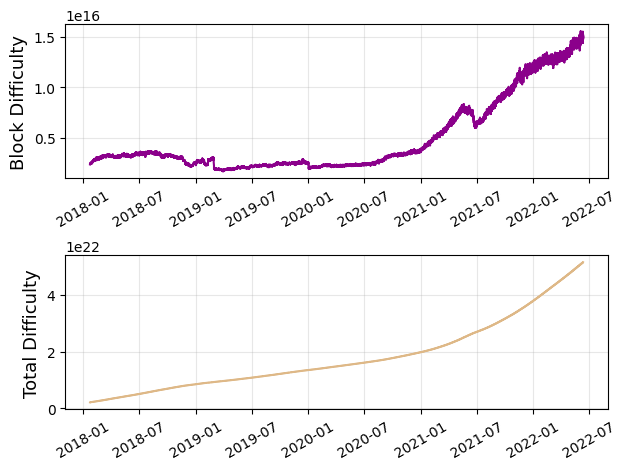

In [208]:
f, axarr = plt.subplots(nrows=2, figsize=(7,5))
axarr[0].plot(dates, diffs, color='darkmagenta')
axarr[1].plot(dates, totalDiffs, color='burlywood')
f.subplots_adjust(hspace=0.5)

for ax in axarr:
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', labelrotation=30)

axarr[0].set_ylabel('Block Difficulty', size=13)
axarr[1].set_ylabel('Total Difficulty', size=13)

plt.show()

In [209]:
np.argwhere(dates == date(2022, 1, 1))

array([[8965],
       [8966],
       [8967],
       [8968],
       [8969],
       [8970],
       [8971]])

In [215]:
subTimestamps = timestamps[8965:]
subDates = dates[8965:]
subDiffs = diffs[8965:]
subTotalDiffs = totalDiffs[8965:]

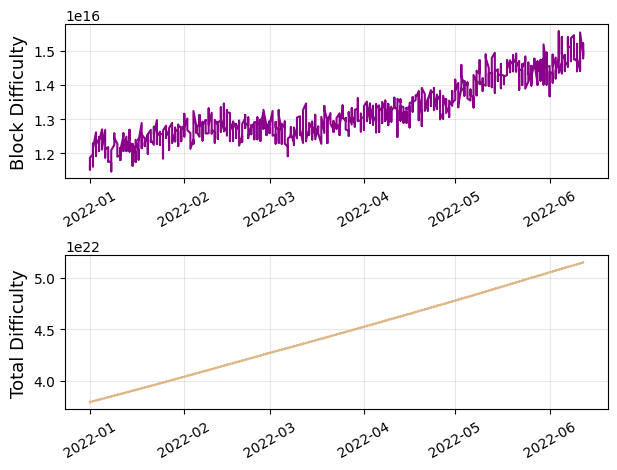

In [212]:
f, axarr = plt.subplots(nrows=2, figsize=(7,5))
axarr[0].plot(subDates, subDiffs, color='darkmagenta')
axarr[1].plot(subDates, subTotalDiffs, color='burlywood', marker=',')
f.subplots_adjust(hspace=0.5)

for ax in axarr:
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', labelrotation=30)

axarr[0].set_ylabel('Block Difficulty', size=13)
axarr[1].set_ylabel('Total Difficulty', size=13)
plt.show()

In [216]:
X = np.reshape(subTimestamps, (-1, 1))
y = np.reshape(subTotalDiffs, (-1, 1))
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9997117207383927

In [224]:
newTimes = subTimestamps[-1] + avgTimeDelta * np.arange(len(subTimestamps))

In [225]:
avgTimeDelta = np.mean(subTimestamps[1:] - subTimestamps[:-1])
xPred = np.append(subTimestamps, newTimes)

In [228]:
yPred = reg.predict(np.reshape(xPred, (-1, 1)))

<ipython-input-236-ea67dc32d5d6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newLabels)


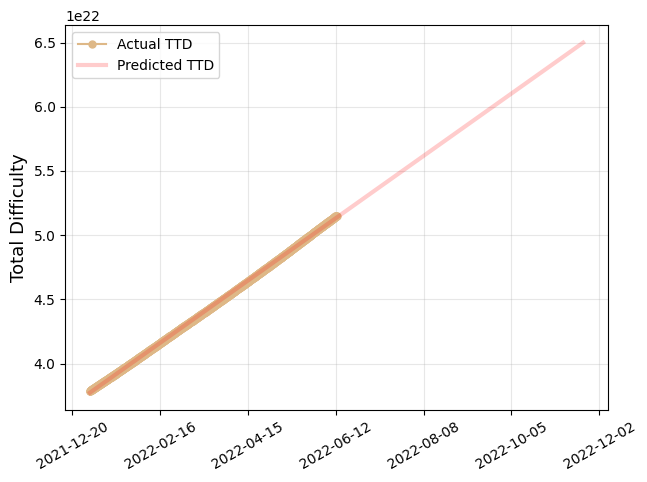

In [236]:
f, ax = plt.subplots(figsize=(7,5))
ax.plot(subTimestamps, subTotalDiffs, color='burlywood', marker='o', markersize=5, label='Actual TTD')
ax.plot(xPred, yPred, 'r-', linewidth=3, alpha=0.2, label='Predicted TTD')
ax.grid(alpha=0.3)
ax.set_ylabel('Total Difficulty', size=13)
newLabels = [datetime.utcfromtimestamp(t).date() for t in ax.get_xticks()]
ax.set_xticklabels(newLabels)
ax.tick_params(axis='x', labelrotation=30)
ax.legend()
plt.show()